### **Latent Dirichlet Allocation**

In this workbook, we will employ LDA on text data to discover the topics discussed:
- xxx
- xxx
- xxx

In [17]:
# nltk.download('punkt')
# nltk.download('stopwords')

In [20]:
# pip install wordcloud

In [61]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
import textblob
import gensim
from PIL import Image

from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
df_processed_full = pd.read_excel("amazon_review_processed_full.xlsx")
df_processed_full.head(5)

,Review Model,Retailer,Review date,Review name,Review rating,Review title,Review Content,Verified Purchase or not,People_find_helpful,vine or not,...,title_word_count,content_char_count,title_char_count,content_avg_word,title_avg_word,content_stopwords,title_stopwords,Brand,Full review,ID
0,Canon Pixma TS6420a,Amazon,2023-08-10,Ernest Birkholz,5,works great,easy install works great,True,0.0,False,...,2,38,11,3.875000,5.000000,3,0,Canon,works great easy install works great,1
1,HP OfficeJet Pro 9015e,Amazon,2022-06-04,mattey,3,spunky mid size,slower speed im used old model 8600 new 9015e ...,True,0.0,False,...,4,460,23,4.835443,5.000000,19,0,HP,spunky mid size slower speed im used old model...,2
2,Canon PIXMA MG3620,Amazon,2023-03-15,Maria D,4,NaN,i,True,0.0,False,...,2,7,12,3.000000,5.500000,0,0,Canon,i,3
3,Epson - ET-3830,Amazon,2022-11-17,Ryan H,5,shag knows hes talking,yup slam upgrade paid little front equivalent ...,True,12.0,False,...,6,469,34,4.595238,4.833333,31,2,Epson,shag knows hes talking yup slam upgrade paid l...,4
4,HP ENVY 6055e,Amazon,2022-04-09,Sam,3,user friendly,would think something simple reconnecting wifi...,True,0.0,False,...,3,861,17,4.387500,5.000000,71,0,HP,user friendly would think something simple rec...,5


In [3]:
df_processed_sents = pd.read_excel("amazon_review_processed_sents.xlsx")
df_processed_sents.head(5)

,Review Model,Retailer,Review date,Review name,Review rating,Review title,Review Content,Verified Purchase or not,People_find_helpful,vine or not,...,title_word_count,content_char_count,title_char_count,content_avg_word,title_avg_word,content_stopwords,title_stopwords,Brand,Full review,ID
0,Canon Pixma TS6420a,Amazon,2023-08-10,Ernest Birkholz,5,works great,['easy install works great'],True,0.0,False,...,2,38,11,3.875000,5.0,3,0,Canon,works great,1
1,Canon Pixma TS6420a,Amazon,2023-08-10,Ernest Birkholz,5,works great,['easy install works great'],True,0.0,False,...,2,38,11,3.875000,5.0,3,0,Canon,easy install works great,1
2,HP OfficeJet Pro 9015e,Amazon,2022-06-04,mattey,3,spunky mid size,"['slower speed im used old model', ' 8600 new ...",True,0.0,False,...,4,460,23,4.835443,5.0,19,0,HP,spunky mid size,2
3,HP OfficeJet Pro 9015e,Amazon,2022-06-04,mattey,3,spunky mid size,"['slower speed im used old model', ' 8600 new ...",True,0.0,False,...,4,460,23,4.835443,5.0,19,0,HP,slower speed im used old model,2
4,HP OfficeJet Pro 9015e,Amazon,2022-06-04,mattey,3,spunky mid size,"['slower speed im used old model', ' 8600 new ...",True,0.0,False,...,4,460,23,4.835443,5.0,19,0,HP,8600 new 9015e sounds like breaking apart inside,2


#### <font color=#FFB703> **Tokenisation** </font>

<font color=#61BEB0>**Tokenisation:**</font>

In [10]:
# Tokenisation (Review Content)
df_processed_full['Tokenized Content'] = df_processed_full['Review Content'].apply(lambda x: word_tokenize(str(x)) if isinstance(x, str) else [])
df_processed_full[['Review Content', 'Tokenized Content']].head(5)

,Review Content,Tokenized Content
0,easy install works great,"[easy, install, works, great]"
1,slower speed im used old model 8600 new 9015e ...,"[slower, speed, im, used, old, model, 8600, ne..."
2,i,[i]
3,yup slam upgrade paid little front equivalent ...,"[yup, slam, upgrade, paid, little, front, equi..."
4,would think something simple reconnecting wifi...,"[would, think, something, simple, reconnecting..."


In [53]:
# Tokenisation (Review Content)
df_processed_sents['Tokenized Content'] = df_processed_sents['Review Content'].apply(lambda x: word_tokenize(str(x)) if isinstance(x, str) else [])
df_processed_sents[['Review Content', 'Tokenized Content']].head(5)

,Review Content,Tokenized Content
0,['easy install works great'],"[[, 'easy, install, works, great, ', ]]"
1,['easy install works great'],"[[, 'easy, install, works, great, ', ]]"
2,"['slower speed im used old model', ' 8600 new ...","[[, 'slower, speed, im, used, old, model, ', ,..."
3,"['slower speed im used old model', ' 8600 new ...","[[, 'slower, speed, im, used, old, model, ', ,..."
4,"['slower speed im used old model', ' 8600 new ...","[[, 'slower, speed, im, used, old, model, ', ,..."


In [11]:
# Tokenisation (Review title)
df_processed_full['Tokenized title'] = df_processed_full['Review title'].apply(lambda x: word_tokenize(str(x)) if isinstance(x, str) else [])
df_processed_full[['Review title', 'Tokenized Content']].head(5)

,Review title,Tokenized Content
0,works great,"[easy, install, works, great]"
1,spunky mid size,"[slower, speed, im, used, old, model, 8600, ne..."
2,NaN,[i]
3,shag knows hes talking,"[yup, slam, upgrade, paid, little, front, equi..."
4,user friendly,"[would, think, something, simple, reconnecting..."


In [54]:
# Tokenisation (Review title)
df_processed_sents['Tokenized title'] = df_processed_sents['Review title'].apply(lambda x: word_tokenize(str(x)) if isinstance(x, str) else [])
df_processed_sents[['Review title', 'Tokenized Content']].head(5)

,Review title,Tokenized Content
0,works great,"[[, 'easy, install, works, great, ', ]]"
1,works great,"[[, 'easy, install, works, great, ', ]]"
2,spunky mid size,"[[, 'slower, speed, im, used, old, model, ', ,..."
3,spunky mid size,"[[, 'slower, speed, im, used, old, model, ', ,..."
4,spunky mid size,"[[, 'slower, speed, im, used, old, model, ', ,..."


#### <font color=#FFB703> **Topic Modelling by Review Rating** </font>

In [56]:
def categorize_rating(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df_processed_full['Rating Category'] = df_processed_full['Review rating'].apply(categorize_rating)
df_processed_sents['Rating Category'] = df_processed_sents['Review rating'].apply(categorize_rating)

In [71]:
def perform_topic_modelling (df, filter, column):
    filtered_df = df[df[column] == filter]

    # Create a dictionary from the tokenized content
    dictionary = corpora.Dictionary(filtered_df['Tokenized Content'])

    # Create a corpus (bag of words) from the tokenized content
    corpus = [dictionary.doc2bow(text) for text in filtered_df['Tokenized Content']]

    # Build the LDA model
    num_topics = 10  # You can adjust the number of topics as needed
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)

    # Print the topics and their top words
    topics = lda_model.print_topics(num_words=10)
    # for topic in topics:
    #     print(topic)

    # Assign the dominant topic to each document
    # filtered_df['Dominant Topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

    # Extract top words from topics
    top_words = []
    for i in range(num_topics):
        top_words.extend(re.findall(r"[a-z]+", lda_model.print_topic(i, topn=5)))

    # Join the top words into a single string
    top_words = " ".join(top_words)
    # print(top_words)

    # lower max_font_size, change the maximum number of word and lighten the background:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(top_words)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

<font color=#61BEB0>**Topic Modelling (Negative):**</font>

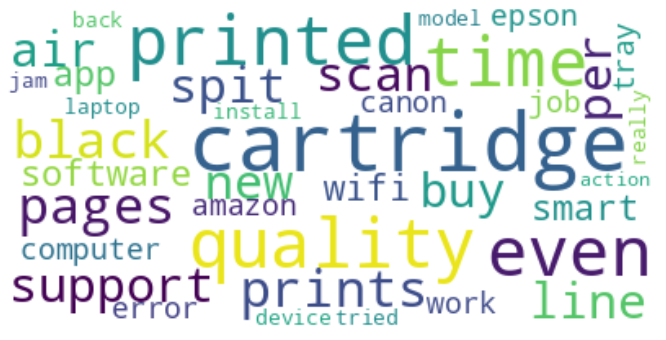

In [72]:
# filter for rating = Negative
df = df_processed_full
filter = 'Negative'
column = 'Rating Category'

perform_topic_modelling(df, filter, column)

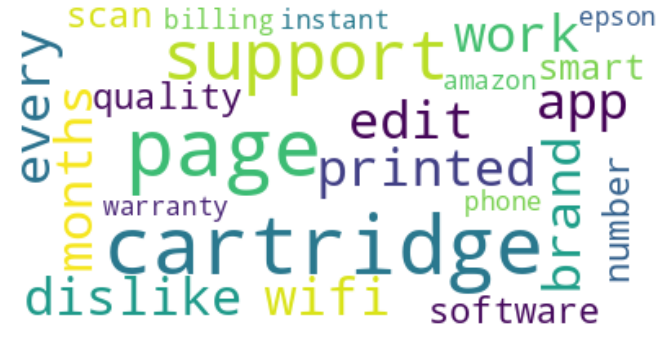

In [73]:
# filter for rating = Negative
df = df_processed_sents
filter = 'Negative'
column = 'Rating Category'

perform_topic_modelling(df, filter, column)

<font color=#61BEB0>**Topic Modelling (Neutral):**</font>

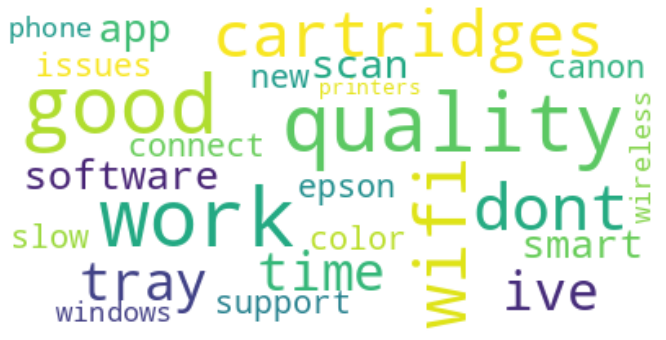

In [74]:
# filter for rating = Neutral
df = df_processed_full
filter = 'Neutral'
column = 'Rating Category'

perform_topic_modelling(df, filter, column)

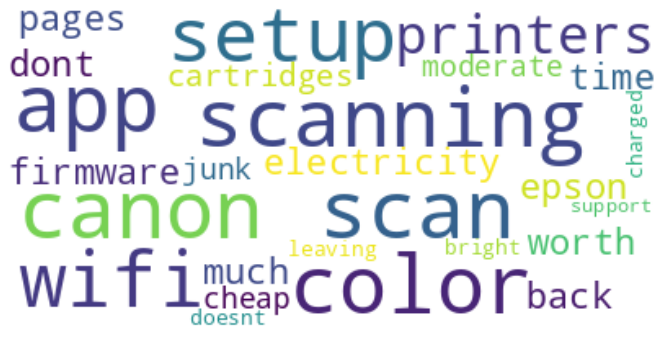

In [75]:
# filter for rating = Negative
df = df_processed_sents
filter = 'Neutral'
column = 'Rating Category'

perform_topic_modelling(df, filter, column)

<font color=#61BEB0>**Topic Modelling (Positive):**</font>

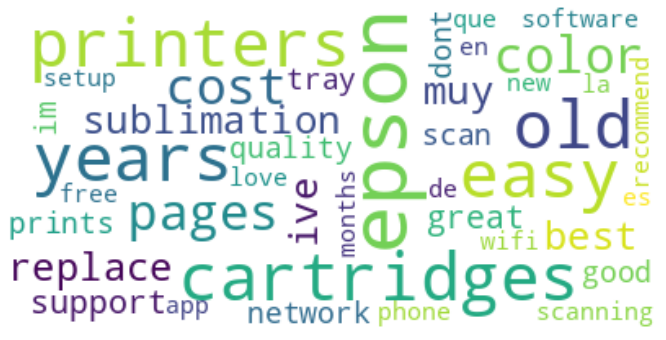

In [76]:
# filter for rating = Positive
df = df_processed_full
filter = 'Positive'
column = 'Rating Category'

perform_topic_modelling(df, filter, column)

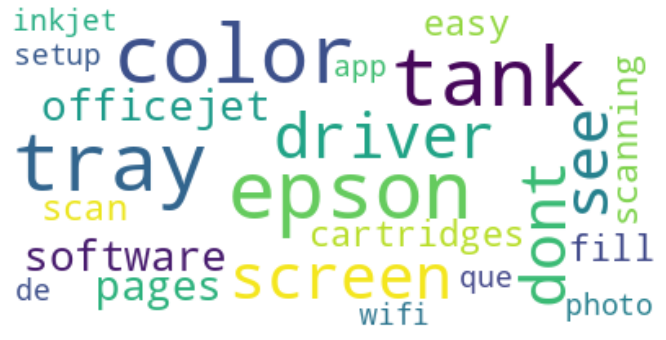

In [77]:
# filter for rating = Positive
df = df_processed_sents
filter = 'Positive'
column = 'Rating Category'

perform_topic_modelling(df, filter, column)

#### <font color=#FFB703> **Topic Modelling by Brand** </font>

<font color=#61BEB0>**Topic Modelling (HP):**</font>

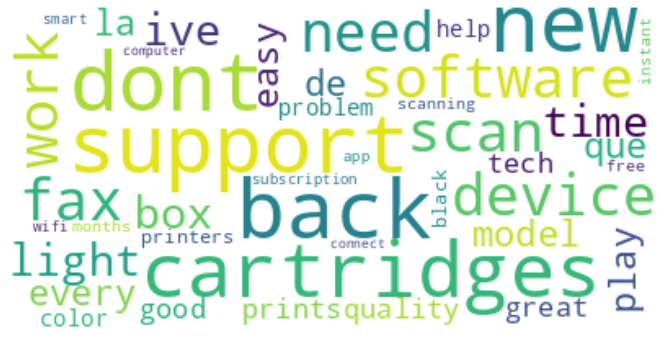

In [78]:
# filter for rating = Negative
df = df_processed_full
filter = 'HP'
column = 'Brand'

perform_topic_modelling(df, filter, column)

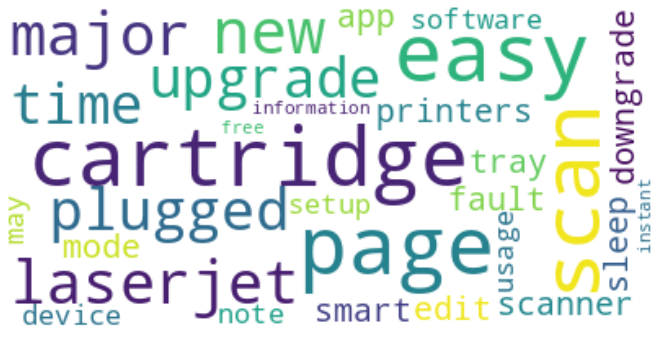

In [79]:
# filter for rating = Negative
df = df_processed_sents
filter = 'HP'
column = 'Brand'

perform_topic_modelling(df, filter, column)

<font color=#61BEB0>**Topic Modelling (Epson):**</font>

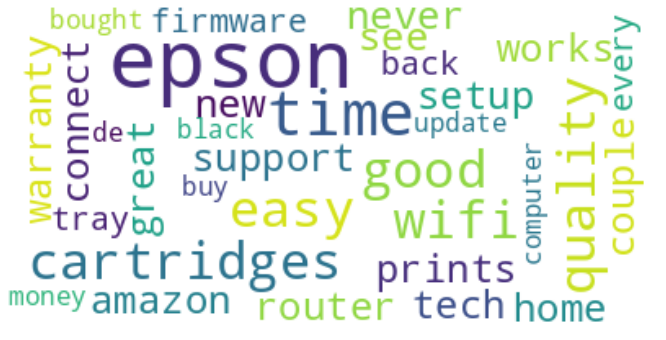

In [82]:
df = df_processed_full
filter = 'Epson'
column = 'Brand'

perform_topic_modelling(df, filter, column)

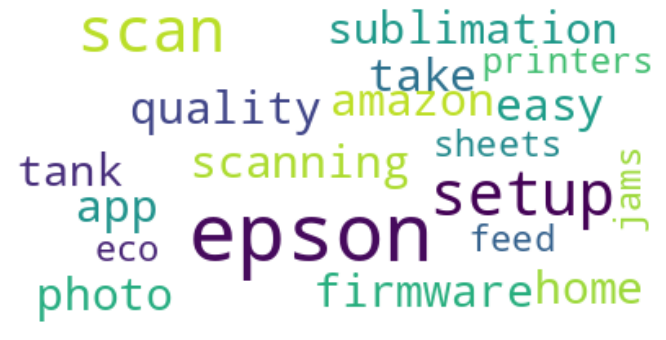

In [80]:
df = df_processed_sents
filter = 'Epson'
column = 'Brand'

perform_topic_modelling(df, filter, column)

<font color=#61BEB0>**Topic Modelling (Cannon):**</font>

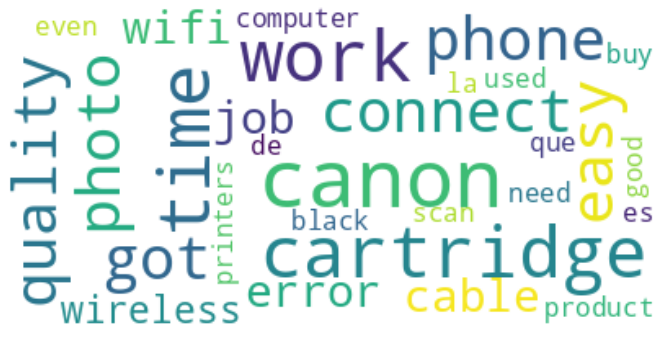

In [83]:
df = df_processed_full
filter = 'Canon'
column = 'Brand'

perform_topic_modelling(df, filter, column)

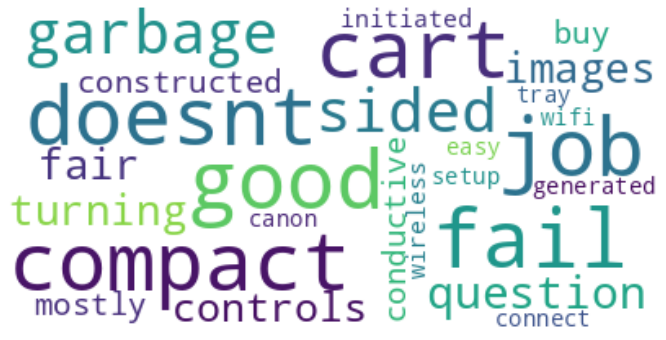

In [81]:
df = df_processed_sents
filter = 'Canon'
column = 'Brand'

perform_topic_modelling(df, filter, column)